In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/Clean_data_2.csv')
dataset = dataset.dropna()
dataset.shape
dataset['pef_zone'].value_counts()

pef_zone
0    587
1    384
2     16
Name: count, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate the classes into different DataFrames.
df_green = dataset[dataset['pef_zone']==0]
df_yellow = dataset[dataset['pef_zone']==1]
df_red = dataset[dataset['pef_zone']==2]
# Upsample minority class.
df_green_downsampled = resample(df_green,
                            replace=True,     # sample with replacement
                            n_samples=300,    # to match majority class
                            random_state=123)
df_red_upsampled = resample(df_red,
                            replace=True,     # sample with replacement
                            n_samples=300,    # to match majority class
                            random_state=123) # reproducible results

df_yellow_upsampled = resample(df_yellow,
                            replace=True,     # sample with replacement
                            n_samples=200,    # to match majority class
                            random_state=123) # reproducible results

# Combine majority class with upsampled minority class.
df_upsampled = pd.concat([df_green_downsampled, df_yellow, df_red_upsampled])

# Display new class counts.
df_upsampled['pef_zone'].value_counts()

pef_zone
1    384
0    300
2    300
Name: count, dtype: int64

In [ ]:
dataset=df_upsampled
X = dataset.drop(columns=['user_key','date','pef_max','pef_zone','severity','Right_activity_type'])
y = dataset['pef_zone']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=123)

In [ ]:
X.head

<bound method NDFrame.head of      sex  age_range  bmi_range  smoker  pef_best  hour  temperature  humidity  \
829    1          1          1       0       580     5        13.91        87   
649    0          2          2       0       450     9        19.66        79   
666    0          2          2       0       450     7        14.33        84   
604    0          3          3       1       325     9         9.97        87   
297    0          3          3       0       450    17        12.86        91   
..   ...        ...        ...     ...       ...   ...          ...       ...   
122    1          3          2       1       575     9         5.04        87   
13     1          3          2       1       575     7        16.25        92   
116    1          3          2       1       575     7         8.43        91   
22     1          3          2       1       575    16        12.30        81   
15     1          3          2       1       575     7        15.47        92   

     aqi   no2   so2  pm2_5  inhaler     Avg_hr  Sum_steps  
829  1.0  7.45  0.93   3.47        1  92.666667       3580  
649  1.0  3.77  1.34   1.88        1  89.850000       1476  
666  1.0  5.83  1.04   3.82        1  64.783333        216  
604  1.0  4.54  1.34   4.09        1  56.600000          0  
297  1.0  6.60  1.24   2.40        2  91.367347         24  
..   ...   ...   ...    ...      ...        ...        ...  
122  1.0  6.43  1.30   8.19        1  98.383333       1314  
13   1.0  7.28  1.70   6.42        1  73.800000         11  
116  1.0  3.13  0.75   1.83        1  78.683333        292  
22   2.0  6.51  1.18  19.86        1  83.311111       1057  
15   1.0  5.57  2.09   5.01        1  88.666667        470  

[984 rows x 15 columns]>

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
neigh.fit(train_X, train_y)


KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [ ]:
y.head

<bound method NDFrame.head of 829    0
649    0
666    0
604    0
297    0
      ..
122    2
13     2
116    2
22     2
15     2
Name: pef_zone, Length: 984, dtype: int64>

In [ ]:
y_train_pred = neigh.predict_proba(train_X)
y_test_pred = neigh.predict_proba(test_X)
train_auc = roc_auc_score(train_y, y_train_pred, multi_class='ovr')
test_auc = roc_auc_score(test_y, y_test_pred, multi_class='ovr')
print(f'Train AUC: {train_auc}, Test AUC: {test_auc}')


Train AUC: 0.9700029306246555, Test AUC: 0.9125833289520076


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# First, we need to get the predicted classes
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute accuracy
train_accuracy = accuracy_score(train_y, y_train_pred_classes)
test_accuracy = accuracy_score(test_y, y_test_pred_classes)

# Compute precision
train_precision = precision_score(train_y, y_train_pred_classes, average='macro')
test_precision = precision_score(test_y, y_test_pred_classes, average='macro')

# Compute recall
train_recall = recall_score(train_y, y_train_pred_classes, average='macro')
test_recall = recall_score(test_y, y_test_pred_classes, average='macro')

# Compute F1 score
train_f1 = f1_score(train_y, y_train_pred_classes, average='macro')
test_f1 = f1_score(test_y, y_test_pred_classes, average='macro')

# Compute confusion matrix
train_cm = confusion_matrix(train_y, y_train_pred_classes)
test_cm = confusion_matrix(test_y, y_test_pred_classes)

# Print the metrics
print(f'Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}')
print(f'Train Precision: {train_precision}, Test Precision: {test_precision}')
print(f'Train Recall: {train_recall}, Test Recall: {test_recall}')
print(f'Train F1 Score: {train_f1}, Test F1 Score: {test_f1}')
print(f'Train Confusion Matrix:\n {train_cm}')
print(f'Test Confusion Matrix:\n {test_cm}')


Train Accuracy: 0.8691232528589581, Test Accuracy: 0.8223350253807107
Train Precision: 0.8682943233790693, Test Precision: 0.8220230473751601
Train Recall: 0.8752204109539746, Test Recall: 0.8248511904761905
Train F1 Score: 0.8711620886983945, Test F1 Score: 0.8208528250932002
Train Confusion Matrix:
 [[192  40   4]
 [ 48 255  11]
 [  0   0 237]]
Test Confusion Matrix:
 [[45 17  2]
 [10 54  6]
 [ 0  0 63]]


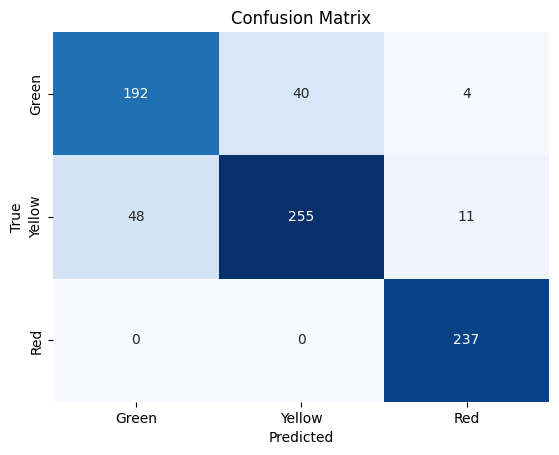

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a heatmap
sns.heatmap(train_cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)

# Set labels
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Set tick labels
ax.xaxis.set_ticklabels(['Green', 'Yellow', 'Red'])
ax.yaxis.set_ticklabels(['Green', 'Yellow', 'Red'])

# Display the plot
plt.show()

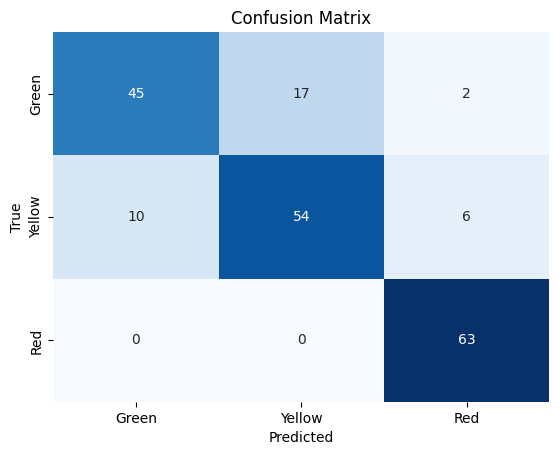

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a heatmap
sns.heatmap(test_cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)

# Set labels
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Set tick labels
ax.xaxis.set_ticklabels(['Green', 'Yellow', 'Red'])
ax.yaxis.set_ticklabels(['Green', 'Yellow', 'Red'])

# Display the plot
plt.show()

In [ ]:
!pip install sklite


In [ ]:
# from sklite import LazyExport

# # Assuming 'neigh' is your trained model
# lazy = LazyExport(neigh)
# lazy.save('knn_model.json')

In [ ]:

# y_train_pred = rf.predict(train_X)
# y_test_pred = rf.predict(test_X)

# train_accuracy = accuracy_score(train_y, y_train_pred)
# test_accuracy = accuracy_score(test_y, y_test_pred)

# print(f'Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}')


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=1337)
rf.fit(train_X, train_y)

y_train_pred = rf.predict(train_X)
y_test_pred = rf.predict(test_X)
train_accuracy = accuracy_score(train_y, y_train_pred)
test_accuracy = accuracy_score(test_y, y_test_pred)
train_precision = precision_score(train_y, y_train_pred, average='macro')
test_precision = precision_score(test_y, y_test_pred, average='macro')

train_recall = recall_score(train_y, y_train_pred, average='macro')
test_recall = recall_score(test_y, y_test_pred, average='macro')

train_f1 = f1_score(train_y, y_train_pred, average='macro')
test_f1 = f1_score(test_y, y_test_pred, average='macro')

train_cm = confusion_matrix(train_y, y_train_pred)
test_cm = confusion_matrix(test_y, y_test_pred)

print(f'Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}')
print(f'Train Precision: {train_precision}, Test Precision: {test_precision}')
print(f'Train Recall: {train_recall}, Test Recall: {test_recall}')
print(f'Train F1 Score: {train_f1}, Test F1 Score: {test_f1}')
print(f'Train Confusion Matrix:\n {train_cm}')
print(f'Test Confusion Matrix:\n {test_cm}')


Train Accuracy: 1.0, Test Accuracy: 0.9238578680203046
Train Precision: 1.0, Test Precision: 0.9237477385798281
Train Recall: 1.0, Test Recall: 0.9258928571428572
Train F1 Score: 1.0, Test F1 Score: 0.9245017116505404
Train Confusion Matrix:
 [[236   0   0]
 [  0 314   0]
 [  0   0 237]]
Test Confusion Matrix:
 [[58  6  0]
 [ 6 61  3]
 [ 0  0 63]]


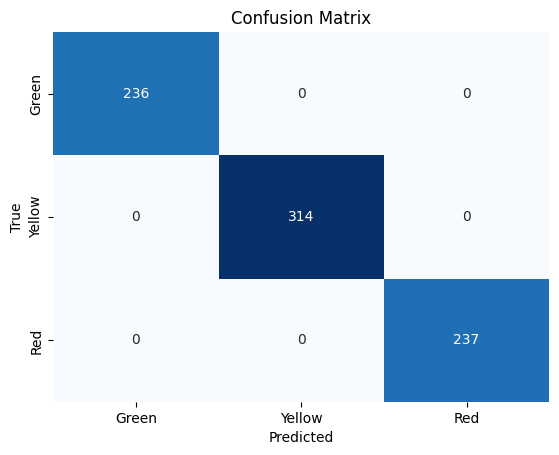

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a heatmap
sns.heatmap(train_cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)

# Set labels
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Set tick labels
ax.xaxis.set_ticklabels(['Green', 'Yellow', 'Red'])
ax.yaxis.set_ticklabels(['Green', 'Yellow', 'Red'])

# Display the plot
plt.show()

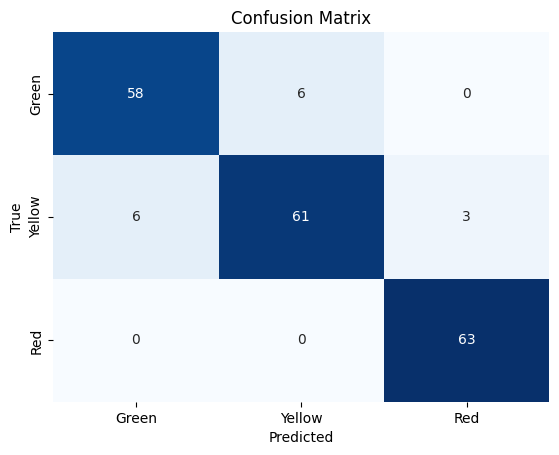

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a heatmap
sns.heatmap(test_cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)

# Set labels
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Set tick labels
ax.xaxis.set_ticklabels(['Green', 'Yellow', 'Red'])
ax.yaxis.set_ticklabels(['Green', 'Yellow', 'Red'])

# Display the plot
plt.show()

In [ ]:
# from sklite import LazyExport

# lazy = LazyExport(rf)
# lazy.save('rf_model.json')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}
# Assuming 'rf' is your trained model
cv_results = cross_validate(rf, X, y, cv=10, scoring=scoring)
for metric in scoring.keys():
    scores = cv_results['test_' + metric]
    print(f'{metric.capitalize()}: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')


Accuracy: 0.84 (+/- 0.24)
Precision: 0.87 (+/- 0.20)
Recall: 0.86 (+/- 0.21)
F1_score: 0.84 (+/- 0.25)


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# param_grid = {
#     'n_estimators': [10, 50, 100, 200, 500],
#     'random_state': [0, 1, 42, 123, 1337]
# }
# random_search = RandomizedSearchCV(rf, param_distributions=param_grid, cv=10, n_iter=25, random_state=0)
# random_search.fit(X, y)


In [ ]:
# # Print the best parameters
# best_params = random_search.best_params_
# print('Best Parameters:', best_params)


In [ ]:
# # Print the best score
# best_score = random_search.best_score_
# print('Best Score:', best_score)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

def compare_models(X, y):
    # Define the models
    models = [
        ('kNN', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Gradient Boost',GradientBoostingClassifier()),
        ('Random Forest', RandomForestClassifier())
    ]

    # Define the metrics
    metrics = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='macro'),
        'recall': make_scorer(recall_score, average='macro'),
        'f1_score': make_scorer(f1_score, average='macro')
    }

    # Perform 10-fold cross-validation and print the mean and standard deviation for each metric
    for name, model in models:
        print(name)
        for metric_name, metric in metrics.items():
            scores = cross_val_score(model, X, y, cv=10, scoring=metric)
            print(f'  {metric_name.capitalize()}: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')

# Call the function with your data
compare_models(X, y)


kNN
  Accuracy: 0.73 (+/- 0.14)
  Precision: 0.74 (+/- 0.13)
  Recall: 0.75 (+/- 0.12)
  F1_score: 0.73 (+/- 0.13)
Decision Tree
  Accuracy: 0.79 (+/- 0.17)
  Precision: 0.83 (+/- 0.15)
  Recall: 0.82 (+/- 0.15)
  F1_score: 0.80 (+/- 0.19)
Gradient Boost
  Accuracy: 0.81 (+/- 0.22)
  Precision: 0.83 (+/- 0.19)
  Recall: 0.83 (+/- 0.19)
  F1_score: 0.81 (+/- 0.23)
Random Forest
  Accuracy: 0.84 (+/- 0.23)
  Precision: 0.87 (+/- 0.21)
  Recall: 0.86 (+/- 0.19)
  F1_score: 0.84 (+/- 0.25)


In [ ]:

# cross_model = RandomForestClassifier(n_estimators=200, random_state=1337)
# scores = cross_val_score(cross_model, X, y, cv=10)
# print('Scores:', scores)
# print('Mean:', scores.mean())
# print('Standard Deviation:', scores.std())
# sklite = SkLite(cross_model)
# lazy.save('cross_rf.json')

In [ ]:
%pip install sklite